In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cloud-classification/data/submission.csv
/kaggle/input/cloud-classification/data/train/St/St-N050.jpg
/kaggle/input/cloud-classification/data/train/St/St-N022.jpg
/kaggle/input/cloud-classification/data/train/St/St-N108.jpg
/kaggle/input/cloud-classification/data/train/St/St-N193.jpg
/kaggle/input/cloud-classification/data/train/St/St-N199.jpg
/kaggle/input/cloud-classification/data/train/St/St-N133.jpg
/kaggle/input/cloud-classification/data/train/St/St-N007.jpg
/kaggle/input/cloud-classification/data/train/St/St-N083.jpg
/kaggle/input/cloud-classification/data/train/St/St-N181.jpg
/kaggle/input/cloud-classification/data/train/St/St-N017.jpg
/kaggle/input/cloud-classification/data/train/St/St-N082.jpg
/kaggle/input/cloud-classification/data/train/St/St-N105.jpg
/kaggle/input/cloud-classification/data/train/St/St-N075.jpg
/kaggle/input/cloud-classification/data/train/St/St-N189.jpg
/kaggle/input/cloud-classification/data/train/St/St-N096.jpg
/kaggle/input/cloud-classifica

/kaggle/input/cloud-classification/data/train/As/As-N186.jpg
/kaggle/input/cloud-classification/data/train/As/As-N031.jpg
/kaggle/input/cloud-classification/data/train/As/As-N108.jpg
/kaggle/input/cloud-classification/data/train/As/As-N148.jpg
/kaggle/input/cloud-classification/data/train/As/As-N054.jpg
/kaggle/input/cloud-classification/data/train/As/As-N016.jpg
/kaggle/input/cloud-classification/data/train/As/As-N004.jpg
/kaggle/input/cloud-classification/data/train/As/As-N174.jpg
/kaggle/input/cloud-classification/data/train/As/As-N156.jpg
/kaggle/input/cloud-classification/data/train/As/As-N027.jpg
/kaggle/input/cloud-classification/data/train/As/As-N067.jpg
/kaggle/input/cloud-classification/data/train/As/As-N011.jpg
/kaggle/input/cloud-classification/data/train/As/As-N058.jpg
/kaggle/input/cloud-classification/data/train/As/As-N158.jpg
/kaggle/input/cloud-classification/data/train/As/As-N013.jpg
/kaggle/input/cloud-classification/data/train/As/As-N106.jpg
/kaggle/input/cloud-clas

In [29]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [30]:
IMAGE_SIZE = [224,224] # Lets us set the image size as 224X224

train_path = "../input/cloud-classification/data/train"


## EDA

Let us plot the no of images in each categories in train

In [31]:
directory = "../input/cloud-classification/data/train"
labels = ['Ac','As','Cb','Cc','Ci','Cs','Ct','Cu','Ns','Sc','St']
targets = []
for val in labels:
    targets.append(len(glob(directory+'/'+val+'/*')))

### Let us plot the pie chart containing the no of images in each folder of training images

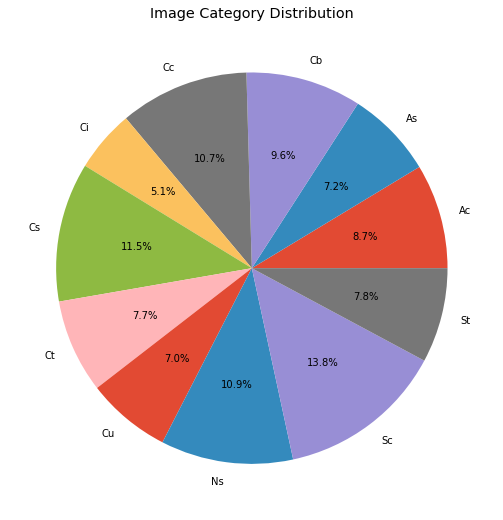

In [32]:
plt.style.use("ggplot")
plt.figure(figsize=(16, 9))
plt.pie(x=targets, labels=labels, autopct="%1.1f%%")
plt.title("Image Category Distribution")
plt.show()

### Let us see some of the images in each folder taking a small sample

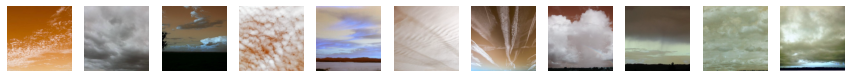

In [33]:
# let us plot the images in each categories

import cv2
images=[]
for val in labels:
    images.append(glob(directory+'/'+val+'/*')[0])
    
fig=plt.figure(figsize=(15, 10))
for i in range(1,len(images)+1):
    img = cv2.imread(images[i-1])
    img = cv2.resize(img,(224,224))
    fig.add_subplot(1,11 , i )
    plt.imshow(img)
    plt.axis(False)
    

## Ben Graham's Method

Ben grahmam method is something like we will convert the images into gray scale and then apply gaussianblue to the images

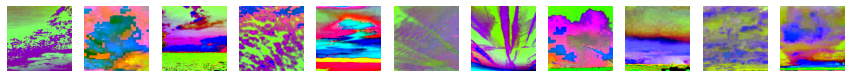

In [34]:
fig=plt.figure(figsize=(15, 10))
for i in range(1,len(images)+1):
    img = cv2.imread(images[i-1])
    img = cv2.resize(img,(224,224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    fig.add_subplot(1, 11, i )
    plt.imshow(img)
    plt.axis(False)

### Let us remove the background from each of the images using the function which is provided by opencv package

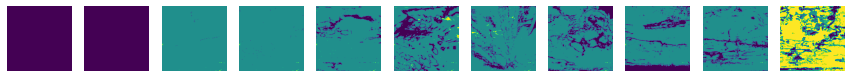

In [35]:
background = cv2.createBackgroundSubtractorMOG2()

fig=plt.figure(figsize=(15, 10))
for i in range(1,len(images)+1):
    img = cv2.imread(images[i-1])
    img = cv2.resize(img,(224,224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = background.apply(img)
    fig.add_subplot(1, 11, i )
    plt.imshow(img)
    plt.axis(False)

## Canny Edge Detection Method
This helps us to understand the edges across the various types of images in the training set of various labels

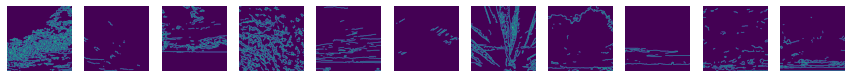

In [36]:
fig=plt.figure(figsize=(15, 10))
for i in range(1,len(images)+1):
    img = cv2.imread(images[i-1])
    img = cv2.resize(img,(224,224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    edges = cv2.Canny(img, 80, 100)
    fig.add_subplot(1,11, i)
    plt.imshow(edges)
    plt.axis(False)

The above thing easily makes us to find the various classes of the images so it will be helpful for us to plot the model!!

**Let me create my own custom model for this**

Here we come to know that the data is a multi-label classification and along with that we usually solve the problem of a cnn as 
train dir and test dir and we know that we will just pass the directory path. So we are going to make the train dir to train as well as validation like this

In [37]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.2,validation_split=0.3)

training_set = train_datagen.flow_from_directory(
        train_path,target_size=(224,224), batch_size=32,class_mode='categorical',
        subset='training')

validation_set = train_datagen.flow_from_directory(
        train_path,target_size=(224,224), batch_size=32,class_mode='categorical',shuffle = True,
        subset='validation')

Found 1630 images belonging to 11 classes.
Found 693 images belonging to 11 classes.


In [38]:
# training a model

import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(len(labels),activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 224, 224, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 64)       

In [39]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0005),metrics=['categorical_accuracy'],loss='categorical_crossentropy')

### Creating a callback function which makes the training stop after particular time

In [40]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_categorical_accuracy')>=0.40):
            print("\nEnding training")
            self.model.stop_training = True
# initiating the myCallback function
callbacks = myCallback()

In [41]:
history = model.fit_generator(training_set,
                              validation_data=validation_set,
                              epochs=15,
                              verbose=1,
                              steps_per_epoch=len(training_set)//5,
                              validation_steps=len(validation_set)//5,
                              callbacks = [callbacks]
                             )

Epoch 1/15
10/10 [==============================] - 10s 1s/step - loss: 2.3992 - categorical_accuracy: 0.0875 - val_loss: 2.3897 - val_categorical_accuracy: 0.1172
Epoch 2/15
10/10 [==============================] - 9s 900ms/step - loss: 2.3558 - categorical_accuracy: 0.1406 - val_loss: 2.1936 - val_categorical_accuracy: 0.2812
Epoch 3/15
10/10 [==============================] - 8s 831ms/step - loss: 2.2646 - categorical_accuracy: 0.1719 - val_loss: 2.2709 - val_categorical_accuracy: 0.2266
Epoch 4/15
10/10 [==============================] - 9s 942ms/step - loss: 2.2624 - categorical_accuracy: 0.1875 - val_loss: 2.2584 - val_categorical_accuracy: 0.2188
Epoch 5/15
10/10 [==============================] - 9s 874ms/step - loss: 2.2617 - categorical_accuracy: 0.1969 - val_loss: 2.3402 - val_categorical_accuracy: 0.2031
Epoch 6/15
10/10 [==============================] - 9s 887ms/step - loss: 2.2477 - categorical_accuracy: 0.2094 - val_loss: 2.2114 - val_categorical_accuracy: 0.1406
Epoch 

<Figure size 432x288 with 0 Axes>

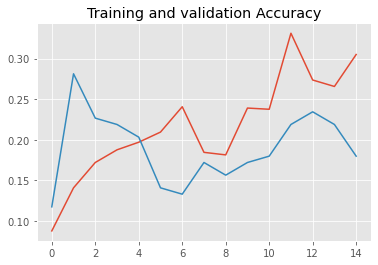

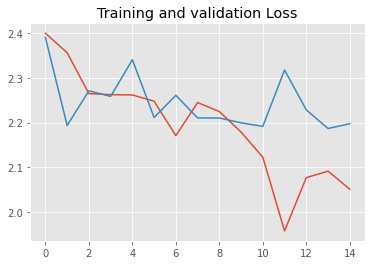

<Figure size 432x288 with 0 Axes>

In [42]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

import matplotlib.pyplot as plt
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title("Training and validation Accuracy")
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title("Training and validation Loss")
plt.figure()

In [43]:
test_path = "../input/cloud-classification/data/test"
from tensorflow.keras.preprocessing import image
def prepare_image(val):
    img = image.load_img(test_path+"/{}.jpg".format(val), target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [44]:
# Let us create a submission file for the competition
import pandas as pd
import numpy as np
submission = pd.read_csv("../input/cloud-classification/data/submission.csv")
submission.to_csv("Samplesubmission.csv",index=False)

prediction = []
for val in submission['Index']:
    prepared = prepare_image(val)
    prediction.append(labels[np.argmax(model.predict(prepared))])

result = pd.DataFrame()
result['Index'] = submission['Index']
result['Class'] = prediction

result.to_csv("submission-file-1.csv",index=False)

### We should create a pretrained model which makes the size of the model to be less so we should choose some model which is of lower size .. That's right we are going to use MobileNET. Let's see how it proceed
### I had watched this research paper to understand about the mobilenet indepth
#### Here is the link to the pdf
https://arxiv.org/pdf/1704.04861.pdf

In [45]:
## Initialising the mobile net model from tensorflow 2.2 version

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout

## We are initialising the input shape with 3 channels rgb and weights as imagenet and include_top as False will make to use our own custom inputs

mv = MobileNet(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [46]:
##Since we are using it to train for our own model we are using the layers.trainable to false so that we can train the model with our own dataset
for layers in mv.layers:
    layers.trainable = False

In [47]:
## Let us add the output to the shape of the folders which is nothing but the target label number
x = Flatten()(mv.output)
prediction = Dense(len(labels),activation='softmax')(x)

## The major advantages of using mobile net is that the question was something like model should be lower size so we are using mobile net and it is compared that it wouldn't be that good compared to vgg16 or resnet but it could give acc like with difference of 2-3 percent

In [48]:
## Let us create a Model with input as mobilenet input and output as the prediction which is initialised before
model = Model(inputs=mv.input,outputs=prediction)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [49]:
## Let us compile the model with Adam optimizer and loss function categorical_crossentropy and metrics as categorical_accuracy
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [50]:
## Let us fit the model with training set and validation as the validation set with 50 epochs and verbose =2 displays only output 
## and created our own custom call backs
history = model.fit_generator(training_set,
                              validation_data=validation_set,
                              epochs=150,
                              verbose=2,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(validation_set),
                              callbacks = [callbacks]
                             )

Epoch 1/15
51/51 - 43s - loss: 2.3700 - categorical_accuracy: 0.3000 - val_loss: 2.5787 - val_categorical_accuracy: 0.3001
Epoch 2/15
51/51 - 42s - loss: 1.5573 - categorical_accuracy: 0.5129 - val_loss: 2.3490 - val_categorical_accuracy: 0.3391
Epoch 3/15
51/51 - 43s - loss: 1.2077 - categorical_accuracy: 0.6025 - val_loss: 2.3999 - val_categorical_accuracy: 0.3449
Epoch 4/15
51/51 - 43s - loss: 1.0038 - categorical_accuracy: 0.6699 - val_loss: 2.4548 - val_categorical_accuracy: 0.3276
Epoch 5/15
51/51 - 42s - loss: 0.8238 - categorical_accuracy: 0.7209 - val_loss: 2.4514 - val_categorical_accuracy: 0.3362
Epoch 6/15


KeyboardInterrupt: 

#### I had ran 150 epochs due to time constraint i couldn't run for that much epochs and the loss function reduce till 1.25 in loss and 2.0 in val_loss


In [ ]:
# plotting the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plotting the accuracies
plt.plot(history.history['categorical_accuracy'], label='train acc')
plt.plot(history.history['val_categorical_accuracy'], label='val acc')
plt.legend()
plt.show()

### Let us make the submission file for the competition

In [ ]:
# Let us create a submission file for the competition
import pandas as pd
import numpy as np
submission = pd.read_csv("../input/cloud-classification/data/submission.csv")

prediction = []
for val in submission['Index']:
    prepared = prepare_image(val)
    prediction.append(labels[np.argmax(model.predict(prepared))])

In [ ]:
result = pd.DataFrame()
result['Index'] = submission['Index']
result['Class'] = prediction

In [ ]:
result.to_csv("submission-mv-2.csv",index=False)

# Here is the link to the submission file 
https://drive.google.com/file/d/1pb8-T5332woI4OPDjzI1ZFM_HghyNBcy/view?usp=sharing

## This submission file gives the accuracy as 0.44805

### I think this model is to be hypertuned but due to time constraint i couldn't perform well with my custom model which make the model size higher...  And from this i learned Though we have higher accuracy if the loss is high then the model fails to perform well in the real time prediction
